# Análisis por categoría y subcategoría📶

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None) # Mostrar todas las columnas
pd.set_option("display.max_rows", None) # Mostrar más filas
pd.set_option("display.width", None) # Evita saltos de lineas raros
pd.set_option("display.float_format", lambda x: f'{x:,.4f}') #Formato de número
pd.set_option("display.expand_frame_repr", False)

df_wide = pd.read_excel("../data/processed/dataset_maestro_wide.xlsx")
print(df_wide.head(10))


    AÑO  MES  AÑO_MES  CCDD   DEPARTAMENTO              PROVINCIA                               DISTRITO                              COMISARIA  CAPTACION_C_INTERNET  CAPTACION_C_OFERTA_DE_ESTUDIO  CAPTACION_C_OFERTA_DE_TRABAJO  CAPTACION_C_OTRO__ESPECIFICAR  CAPTACION_C_PADRINAZGO  CAPTACION_C_SEDUCCION  CAPTACION_C_TOTAL  DESTINO_DEL_HECHO_D_COMISARIA  DESTINO_DEL_HECHO_D_DESISTIMIENTO  DESTINO_DEL_HECHO_D_FISCALIA  DESTINO_DEL_HECHO_D_JUEZ  DESTINO_DEL_HECHO_D_OTRAS_AUTORIDADES  DESTINO_DEL_HECHO_D_OTRO  DESTINO_DEL_HECHO_D_PENDIENTE_DE_INVESTIGACION  DESTINO_DEL_HECHO_D_TOTAL  EM_EF_TOTAL_EM_EF_TOTAL  EXPLOTACION_F2_ACTIVIDAD_AGROPECUARIA  EXPLOTACION_F2_ACTIVIDAD_PESQUERA  EXPLOTACION_F2_ALBAÑILERIA  EXPLOTACION_F2_CENTRO_DE_MASAJES  EXPLOTACION_F2_CENTRO_DE_PRODUCCION_DE_PORNOGRAFIA  EXPLOTACION_F2_DISCOTECA  EXPLOTACION_F2_ESTIBADORES  EXPLOTACION_F2_ESTUDIO_DE_MODELAJE  EXPLOTACION_F2_FABRICA_ARTESANAL_DE_LADRILOS  EXPLOTACION_F2_MENDICIDAD__VIA_PUBLICA  EXPLOTACION_F2_MINERIA_

## 1. Captación🔍

In [75]:
#Cadena que representan subcategorías de CAPTACIÓN
sub_cap_cols = [
    col
    for col in df_wide.columns
    if col.startswith("CAPTACION_C_") and "TOTAL" not in col
]
sub_cap = df_wide[sub_cap_cols].sum().sort_values(ascending=False)
print(f'Subcategorías de CAPTACIÓN:\n{sub_cap}')

Subcategorías de CAPTACIÓN:
CAPTACION_C_OFERTA_DE_TRABAJO    3485
CAPTACION_C_OTRO__ESPECIFICAR    1258
CAPTACION_C_INTERNET              221
CAPTACION_C_OFERTA_DE_ESTUDIO      79
CAPTACION_C_SEDUCCION              75
CAPTACION_C_PADRINAZGO             24
dtype: int64


### 1.1. Limpieza del nombre de las columnas🧹

In [76]:
#Cambiamos los nombres del index
sub_cap.index = sub_cap.index.str.replace("__", " ")
sub_cap.index = sub_cap.index.str.replace("CAPTACION_C_", "").str.replace("_", " ").str.title()
print(sub_cap.index)

Index(['Oferta De Trabajo', 'Otro Especificar', 'Internet',
       'Oferta De Estudio', 'Seduccion', 'Padrinazgo'],
      dtype='object')


In [77]:
#Agregamos tilde
sub_cap = sub_cap.rename(index = {"Seduccion" : "Seducción"})
sub_cap = sub_cap.rename(index = {"Otro Especificar" : "Otro"})
print(sub_cap)

Oferta De Trabajo    3485
Otro                 1258
Internet              221
Oferta De Estudio      79
Seducción              75
Padrinazgo             24
dtype: int64


### 1.2. Gráfica de las subcategorías de captación para el periodo de Enero del 2027 a Diciembre del 2025

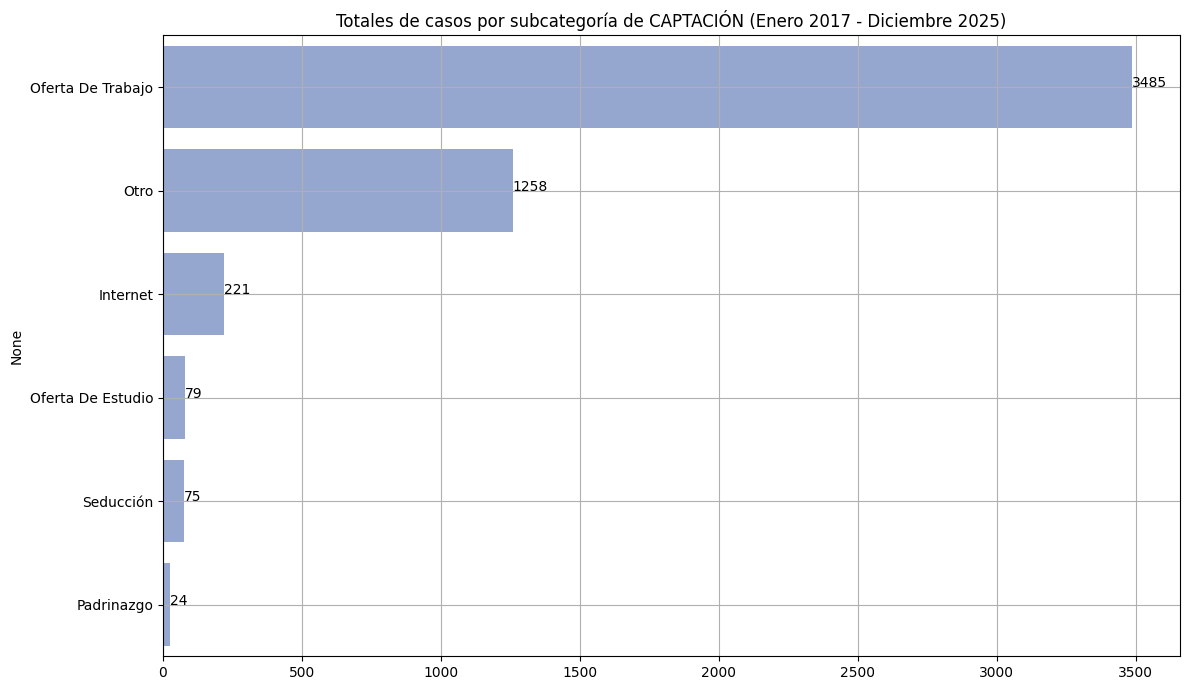

In [80]:
#Graficamos
plt.figure(figsize=(12, 7))
sns.barplot(x = sub_cap.values, y =sub_cap.index, color = "#8ca3d9")
for i, v in enumerate(sub_cap.values):
    plt.text(v, i, str(int(v)))

plt.title("Totales de casos por subcategoría de CAPTACIÓN (Enero 2017 - Diciembre 2025)")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/imagenes/Subcategoría_captación")
plt.show()

## 2. Destino del hecho 🚓

In [88]:
sub_dest_cols = [
    col 
    for col in  df_wide.columns
    if col.startswith("DESTINO_DEL_HECHO_D_") and "TOTAL" not in col
]

sub_dest = df_wide[sub_dest_cols].sum().sort_values(ascending = False)
print(f'Subcategoría DESTINO DEL HECHO:\n{sub_dest}') 

Subcategoría DESTINO DEL HECHO:
DESTINO_DEL_HECHO_D_FISCALIA                      2649
DESTINO_DEL_HECHO_D_PENDIENTE_DE_INVESTIGACION     550
DESTINO_DEL_HECHO_D_OTRAS_AUTORIDADES              233
DESTINO_DEL_HECHO_D_OTRO                           221
DESTINO_DEL_HECHO_D_COMISARIA                      188
DESTINO_DEL_HECHO_D_JUEZ                            85
DESTINO_DEL_HECHO_D_DESISTIMIENTO                    2
dtype: int64


### 2.1. Limpieza de columnas🧹

In [90]:
sub_dest.index = sub_dest.index.str.replace("DESTINO_DEL_HECHO_D_", "").str.title().str.replace("_", " ")
sub_dest= sub_dest.rename(index = {"Fiscalia": "Fiscalía", "Pendiente De Investigacion" : "Pendiente De Investigación", "Comisaria" : "Comisaría"})
print(sub_dest)

Fiscalía                      2649
Pendiente De Investigación     550
Otras Autoridades              233
Otro                           221
Comisaría                      188
Juez                            85
Desistimiento                    2
dtype: int64


## 2.2. Gráfica de las subcategorías de DESTINO DEL HECHO desde Enero del 2017 hasta Septiembre del 2025📈

In [93]:
plt.figure(figsize=(12, 7))
sns.barplot(x = sub_dest.values, y=sub_dest.index, color = "#ffd453")
for i, v in enumerate(sub_dest.values):
    plt.text(i, v, str(int(v)))

plt.title("Destino de los delitos entre Enero del 2017 al Septiembre del 2025")
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\MilderGonzalez\AppData\Local\Temp\ipykernel_11140\466139456.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
